<a href="https://colab.research.google.com/github/Sasnika/SmartKnower/blob/master/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset: [Heart disease Analysis](https://www.kaggle.com/ronitf/heart-disease-uci)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Attribute info
#1. age
#2. sex(1 = male; 0 = female)
#3. chest pain type(4 values)
#4. resting blood pressure 
#5. cholestorol
#6. fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
#7. resting electrocardiographic results(values 0,1,2)
#8. maximum heart rate achieved
#9. exercise induced angina (1 = yes; 0 = no)
#10. oldpeak: ST depression induced by exercise relative to rest
#11. the slope of the peak exercise ST segment
#12. number of major vessels (0-3) colored by flourosopy
#13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#14. target: 1 or 0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.isnull().sum() #checking for null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
cor = df.corr()['target'].abs().sort_values()
cor

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64

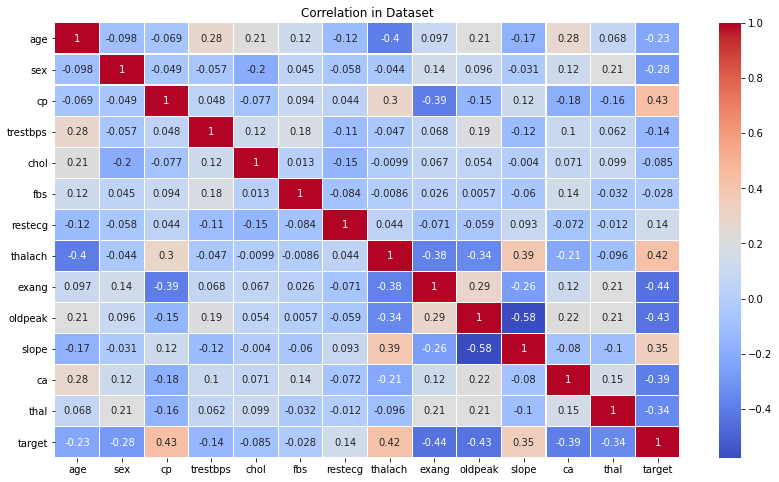

In [ ]:
#Exploratory Data Analysis
#correlation heatmap
plt.figure(figsize=(14,8)) 
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title('Correlation in Dataset')
plt.show()

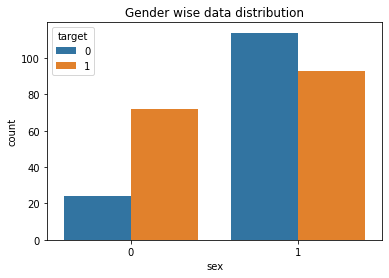

In [ ]:
#visualizing the value counts of the sex variable wrt target
graph = sns.countplot(x="sex", hue="target", data=df)
plt.title('Gender wise data distribution') #0-female;1-male
plt.show()

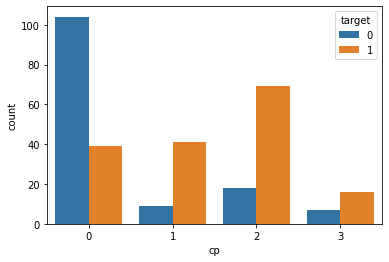

In [ ]:
#visualizing the value counts of the cp variable wrt target
graph1 = sns.countplot(x="cp", hue="target", data=df)
plt.show()

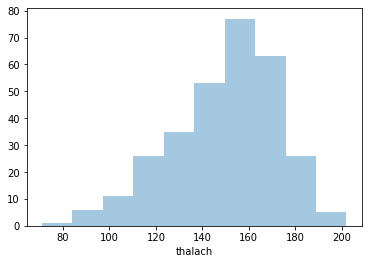

In [ ]:
#thalach: maximum heart rate achieved #histogram
sns.distplot(df['thalach'],kde=False,bins=10) 

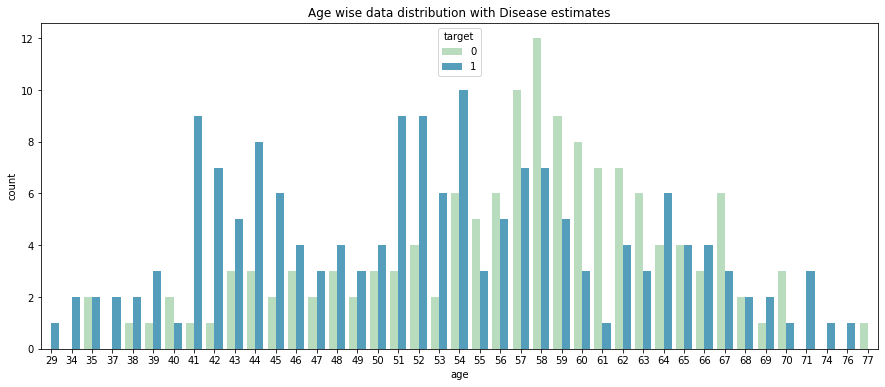

In [ ]:
#Number of people who have heart disease according to age
plt.figure(figsize=(15,6)) 
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.title('Age wise data distribution with Disease estimates')
plt.show()

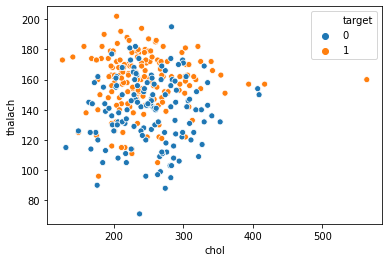

In [ ]:
#Scatter plot for thalach vs chol
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

In [ ]:
#Splitting the data
X= df.drop('target',axis=1)
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [ ]:
X_train.shape

(212, 13)

In [ ]:
X_test.shape

(91, 13)

In [ ]:
#Preprocessing-Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)



In [ ]:
#KNN classification
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [ ]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
250    0
19     1
143    1
79     1
144    1
Name: target, Length: 91, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred)*100)


Accuracy Score:  83.51648351648352


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[31 10]
 [ 5 45]]


In [ ]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
predict = log.predict(X_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict)*100)


Accuracy Score:  81.31868131868131


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predict))

[[32  9]
 [ 8 42]]
